* Get more training example -- fix high variance
* Try small set of features -- fix high varince
* Try getting more features -- fix high bias
* Try adding polynomial features -- fix high bias
* Try decreasing lambda -- fix high bias
* Try increasing lambda -- fix high variance
***
**判断模型是高误差还是高方差，可以通过绘制学习曲线来判断；一般来说，我们需要把数据集按6：2：2分为train set validation set test set，通过绘制$J_{train}$和$J_{cv}$ versus m，可以得出是high variance还是high bias，并以此选择合适的方法完善模型。**

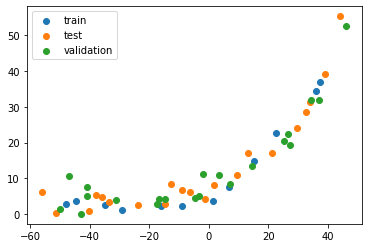

In [11]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

X = loadmat('ex5data1.mat')['X']
y = loadmat('ex5data1.mat')['y']
Xtest = loadmat('ex5data1.mat')['Xtest']
ytest = loadmat('ex5data1.mat')['ytest']
Xval = loadmat('ex5data1.mat')['Xval']
yval = loadmat('ex5data1.mat')['yval']

plt.scatter(X, y, label='train')
plt.scatter(Xtest, ytest, label='test')
plt.scatter(Xval, yval, label='validation')
plt.legend()
plt.show()

**初始化lam=1，degree=8，通过绘制学习曲线，我们发现，该参数下的模型是过拟合的，我们可以通过增大lam或降低degree以及减少特征量（此处只有一个特征，故忽略该方法）**
***
**经过在验证集上的运算，我们得出λ=3时，效果是较好的，运用到test集上，我们看看效果如何。在validation set上lam=3的表现较好，但lam=3在test set上的效果也还行。**

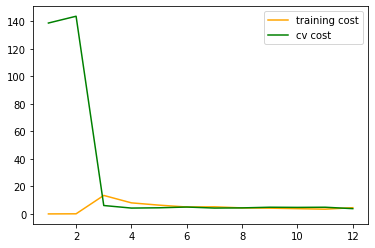

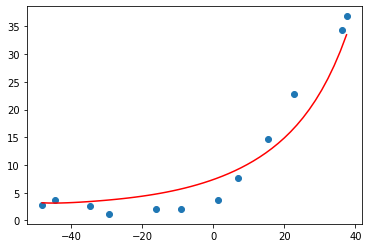

In [20]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

data = loadmat('ex5data1.mat')
X_, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

def data_process(X, Xval, Xtest, degree, para):
    for i in range(degree+1):
        X = np.insert(X, X.shape[1], values=np.power(X[:,0], i), axis=1)
        Xval = np.insert(Xval, Xval.shape[1], values=np.power(Xval[:,0], i), axis=1)
        Xtest = np.insert(Xtest, Xtest.shape[1], values=np.power(Xtest[:,0], i), axis=1)
    X = np.delete(X, 0, axis=1)
    Xval = np.delete(Xval, 0, axis=1)
    Xtest = np.delete(Xtest, 0, axis=1)
    for i in range(1, X.shape[1]):
        mean = X[:, i].mean()
        std = X[:, i].std()
        X[:, i] = (X[:, i]-mean)/std
        Xval[:, i] = (Xval[:, i]-mean)/std
        Xtest[:, i] = (Xtest[:, i]-mean)/std
        para.append(mean)
        para.append(std)
    return X, Xval, Xtest, para
    
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = np.sum(np.power(X@theta.T-y, 2))/(2*X.shape[0])
    return error

def costreg(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = cost(theta, X, y)
    reg = lam/(2*X.shape[0])*np.sum(np.power(theta[0, 1:], 2))
    return error+reg

def gradient(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(theta.shape[1])
    
    grad = (X.T@(X@theta.T-y)).T/X.shape[0]+lam/X.shape[0]*theta
    grad[0, 0] = np.sum((X@theta.T-y).T)/X.shape[0]
    return grad

def func(x, theta, degree, para):
    y = theta[0]
    for i in range(1, degree+1):
        y += ((x**i-para[2*i-2])/para[2*i-1])*theta[i]
    return y

lam = 3
para = []
degree = 8
X, Xval, Xtest, para = data_process(X_, Xval, Xtest, degree, para)
theta = np.zeros((1, X.shape[1]))

error_train = []
error_cv = []
for i in range(1, X.shape[0]+1):
    theta_ = minimize(fun=costreg, x0=(theta), method='TNC', args=(X[:i, :], y[:i, :], lam), jac=gradient)['x']
    error_train.append(cost(theta_, X[:i, :], y[:i, :]))
    error_cv.append(cost(theta_, Xval, yval))

plt.plot(range(1, X.shape[0]+1), error_train, color='orange', label='training cost')
plt.plot(range(1, X.shape[0]+1), error_cv, color='green', label='cv cost')
plt.legend()
plt.show()

plt.scatter(X_[:,0], y)
plt.plot(np.linspace(X_[:,0].min(), X_[:,0].max()), func(np.linspace(X_[:,0].min(), X_[:,0].max()), theta_, degree, para), color='r')
plt.show()

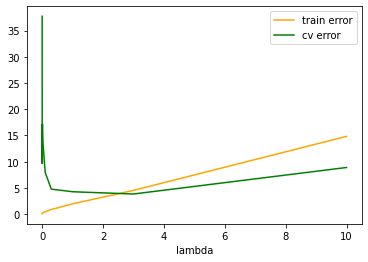

0:37.74078814334163
0.001:9.635751245532282
0.003:15.969120264600095
0.01:17.146299501852965
0.03:13.213823131753381
0.1:7.92680462699163
0.3:4.760869864695687
1:4.263347976557894
3:3.8321776141485695
10:8.88972362533946

0:18.07240712892845
0.001:15.292385950318614
0.003:16.92479490121573
0.01:16.097952600900214
0.03:13.272557023597988
0.1:9.478291285235548
0.3:5.321210583578681
1:2.7800162045559844
3:3.5720466729367937
10:15.315697333552603


In [13]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

data = loadmat('ex5data1.mat')
X_, y, Xtest, ytest, Xval, yval = data['X'], data['y'], data['Xtest'], data['ytest'], data['Xval'], data['yval']

def data_process(X, Xval, Xtest, degree, para):
    for i in range(degree+1):
        X = np.insert(X, X.shape[1], values=np.power(X[:,0], i), axis=1)
        Xval = np.insert(Xval, Xval.shape[1], values=np.power(Xval[:,0], i), axis=1)
        Xtest = np.insert(Xtest, Xtest.shape[1], values=np.power(Xtest[:,0], i), axis=1)
    X = np.delete(X, 0, axis=1)
    Xval = np.delete(Xval, 0, axis=1)
    Xtest = np.delete(Xtest, 0, axis=1)
    for i in range(1, X.shape[1]):
        mean = X[:, i].mean()
        std = X[:, i].std()
        X[:, i] = (X[:, i]-mean)/std
        Xval[:, i] = (Xval[:, i]-mean)/std
        Xtest[:, i] = (Xtest[:, i]-mean)/std
        para.append(mean)
        para.append(std)
    return X, Xval, Xtest, para
    
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = np.sum(np.power(X@theta.T-y, 2))/(2*X.shape[0])
    return error

def costreg(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    error = cost(theta, X, y)
    reg = lam/(2*X.shape[0])*np.sum(np.power(theta[0, 1:], 2))
    return error+reg

def gradient(theta, X, y, lam):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros(theta.shape[1])
    
    grad = (X.T@(X@theta.T-y)).T/X.shape[0]+lam/X.shape[0]*theta
    grad[0, 0] = np.sum((X@theta.T-y).T)/X.shape[0]
    return grad

def func(x, theta, degree, para):
    y = theta[0]
    for i in range(1, degree+1):
        y += ((x**i-para[2*i-2])/para[2*i-1])*theta[i]
    return y

para = []
degree = 8
X, Xval, Xtest, para = data_process(X_, Xval, Xtest, degree, para)
theta = np.zeros((1, X.shape[1]))

error_train = []
error_cv = []
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
for i in l_candidate:
    lam = i
    theta_ = minimize(fun=costreg, x0=(theta), method='TNC', args=(X, y, lam), jac=gradient)['x']
    error_train.append(cost(theta_, X, y))
    error_cv.append(cost(theta_, Xval, yval))
plt.plot(l_candidate, error_train, color='orange', label='train error')
plt.plot(l_candidate, error_cv, color='green', label='cv error')
plt.legend()
plt.xlabel('lambda')
plt.show()

for i in range(10):
    print(f"{l_candidate[i]}:{error_cv[i]}")
print()
for i in l_candidate:
    lam = i
    theta_ = minimize(fun=costreg, x0=(theta), method='TNC', args=(X, y, lam), jac=gradient)['x']
    print(i,":", cost(theta_, Xtest, ytest), sep='')